In [3]:
pip install ucimlrepo


Instala e importa la librería ucimlrepo, y descarga el dataset Auto MPG (consumo de combustible) desde el repositorio UCI.

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


Separa las características (X) del dataset (peso, cilindros, potencia, etc.) y la variable objetivo


In [5]:
X.head()


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


(y) que es el consumo en millas por galón (mpg).

In [6]:
y.head()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Muestra las primeras filas y la estructura de los datos para verificar tipos y valores.

In [7]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [8]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [9]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


Une las características y el objetivo en un solo DataFrame (df) y elimina filas con valores nulos.

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [11]:
X = df.drop('mpg', axis=1)
y = df['mpg']


Separa de nuevo los predictivos (X) y el valor objetivo (y) limpio.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


Divide el conjunto de datos:
80% para entrenar y 20% para evaluar el modelo.

In [13]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Normaliza los valores para que todas las variables tengan la misma escala y mejor rendimiento.

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Crea una red neuronal para regresión con 3 capas ocultas (relu) y una salida lineal (predice valores numéricos de mpg).

In [16]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


Usa el optimizador Adam, mide el error con MSE (error cuadrático medio) y el rendimiento con RMSE.

In [17]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)


In [18]:
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 431.3705 - root_mean_squared_error: 20.3781 - val_loss: 25.7757 - val_root_mean_squared_error: 5.0770
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.1203 - root_mean_squared_error: 4.1284 - val_loss: 14.5308 - val_root_mean_squared_error: 3.8119
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.8718 - root_mean_squared_error: 3.4278 - val_loss: 12.1555 - val_root_mean_squared_error: 3.4865
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7939 - root_mean_squared_error: 3.1138 - val_loss: 15.1097 - val_root_mean_squared_error: 3.8871
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2989 - root_mean_squared_error: 3.0294 - val_loss: 10.2056 - val_root_mean_squared_error: 3.1946


Entrena el modelo por 5 épocas, ajustando pesos con los datos de entrenamiento y validación.

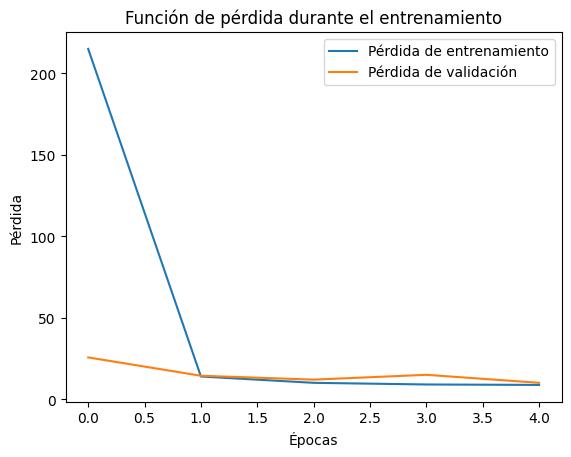

In [19]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


Grafica cómo disminuye la pérdida (error) a lo largo del entrenamiento.

In [20]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.5023 - root_mean_squared_error: 3.0749 
Test Mean Absolute Error: 3.19


Evalúa el modelo en los datos de prueba para obtener el error final.

In [21]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
     Actual  Predicted
82     23.0  22.653254
167    29.0  28.243855
356    32.4  34.632290
120    19.0  18.607685
385    38.0  38.801384


Predice el consumo (mpg) y compara los valores reales con los predichos.

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8527804476615014
MSE: 10.205594333277483


Calcula el R² (nivel de ajuste del modelo) y el MSE (error medio cuadrático) para medir qué tan bien predice la red neuronal.